# Analisis Exploratorio Global Salary Tech Industry

## Introduccion
Este proyecto tiene como objetivo analizar los patrones salariales a nivel global, explorando cómo factores como la ubicación, el nivel de experiencia, el tipo de empleo, el tamaño de la empresa y el título del trabajo impactan en los salarios de los profesionales. El análisis será llevado a cabo por Lucas, analista de datos, y Mathias, científico de datos. Juntos, utilizaremos un conjunto de datos sobre salarios en dólares estadounidenses para identificar tendencias y diferencias clave, con el fin de proporcionar una visión más clara del panorama salarial global. Este análisis busca ofrecer insights valiosos tanto para empleados como para empleadores en un mundo laboral cada vez más interconectado y diverso.

## Metodologia
Esta seccion se describen las tacticas y herramientas utilizadas para llevar acabo el analisis de datos.

## Recoleccion de Datos
* **Fuentes:** Global Tech Salary.

## Procesamiento y Limpieza
* **Procesamiento:** Se cambio el tipo de dato de columnas especificas para asegurar una correcta interpretacion y analisis. Ademas, se eliminaron datos duplicados para mejorar la calidad del dataset.
* **Herramientas:** Se utilizaron librerias como pandas para la manipulacion y transformacion de los datos.

## Analisis y Modelado
* **Tecnicas:** Se aplico analisis exploratorio de datos y visualizaciones.
* **Herramientas y Librerias:** Se utilizaron matplotlib/seaborn para la visualizacion.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving global_tech_salary.csv to global_tech_salary.csv


In [5]:
# Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recoleccion de Datos
* **Fuentes:** Datos Global Tech Salary.

In [6]:
# Carga de datos
df = pd.read_csv('global_tech_salary.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [ ]:
# Creo una copia del DataFrame
df_copy = df.copy()

In [ ]:
# Observo los tipos de datos de las columnas
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Resumen estadistico
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


In [ ]:
# Informacion detallada del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


----

# Procesamiento y Limpieza
* **Procesamiento:**
* **Herramientas:** Se utilizo la libreria `pandas` para la manipulacion y transformacion de los datos.

In [ ]:
# Cambio tipos de datos de columnas
columnas_a_convertir = [
    'experience_level',
    'employment_type',
    'job_title',
    'salary_currency',
    'employee_residence',
    'company_location',
    'company_size'
]

for col in columnas_a_convertir:
    df[col] = df[col].astype('category')

In [ ]:
filas_duplicadas =df.duplicated().sum()
print(f'Filas duplicadas: {filas_duplicadas}')
#muestro las filas duplicadas
df[df.duplicated()]

Filas duplicadas: 1144


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
136,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
145,2024,SE,FT,Machine Learning Engineer,229900,USD,229900,US,0,US,M
180,2023,SE,FT,Data Engineer,130000,USD,130000,US,0,US,M
184,2023,SE,FT,Data Engineer,140000,USD,140000,US,0,US,M
191,2023,SE,FT,Data Scientist,45000,EUR,48585,ES,0,ES,M
...,...,...,...,...,...,...,...,...,...,...,...
4984,2023,SE,FT,Research Engineer,196000,USD,196000,US,0,US,M
4987,2023,SE,FT,Data Analyst,75000,GBP,92280,GB,0,GB,M
4990,2022,SE,FT,Data Engineer,153600,USD,153600,US,0,US,M
4996,2022,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M


----

# Analisis de Datos

## 1. Análisis por Años de Trabajo (work_year)
a. Tendencia de salarios por año:

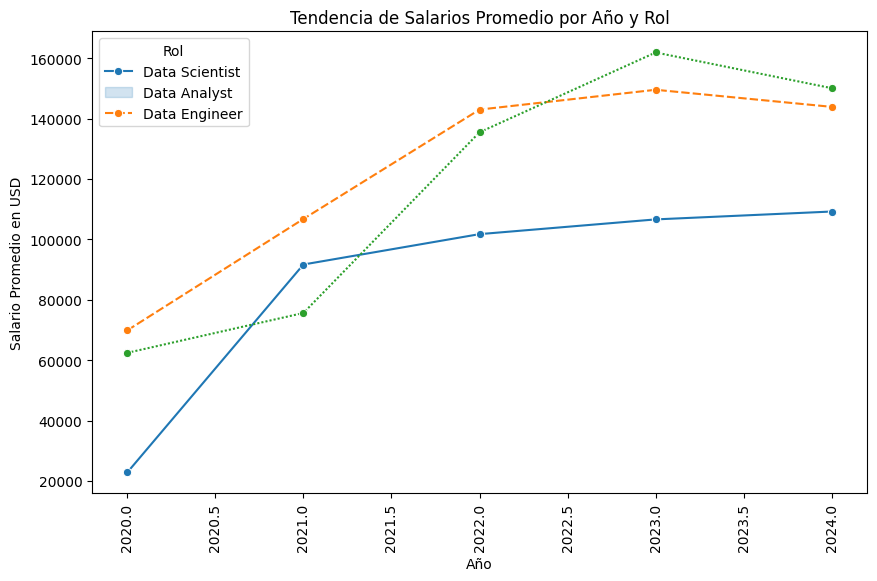

In [ ]:
# Filtrar roles de interés
roles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
df_roles = df[df['job_title'].isin(roles)]

# Análisis de salarios promedio por año y rol
salary_by_year = df_roles.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()

# Visualización
plt.figure(figsize=(10, 6))
sns.lineplot(data=salary_by_year, marker='o')
plt.title('Tendencia de Salarios Promedio por Año y Rol')
plt.xlabel('Año')
plt.ylabel('Salario Promedio en USD')
plt.legend(title='Rol', labels=roles)
plt.xticks(rotation=90)
plt.show()


b. Variaciones salariales por año y puesto:

C:\Users\eze_c\AppData\Local\Temp\ipykernel_11828\3227757534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_title', y='salary_in_usd', data=df_2024_roles, palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon'})


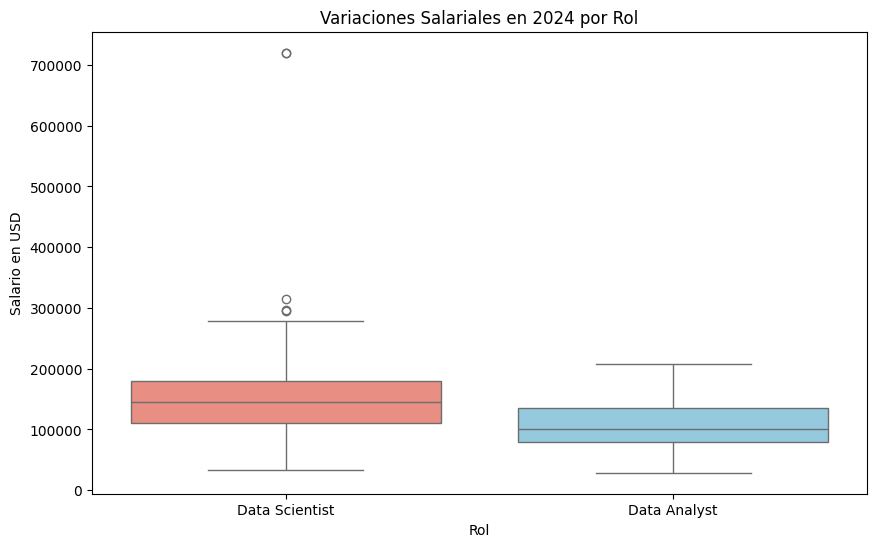

In [ ]:
# Filtrar 2024 para Data Analysts y Data Scientists
df_2024 = df[df['work_year'] == 2024]
roles_2024 = ['Data Analyst', 'Data Scientist']
df_2024_roles = df_2024[df_2024['job_title'].isin(roles_2024)]

# Boxplot de variaciones salariales por rol
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_2024_roles, palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon'})
plt.title('Variaciones Salariales en 2024 por Rol')
plt.xlabel('Rol')
plt.ylabel('Salario en USD')
plt.show()


c. Impacto de la ubicación geográfica por año:

---

## 2. Impacto del Nivel de Experiencia (experience_level)
a. Comparación de salarios por nivel de experiencia:

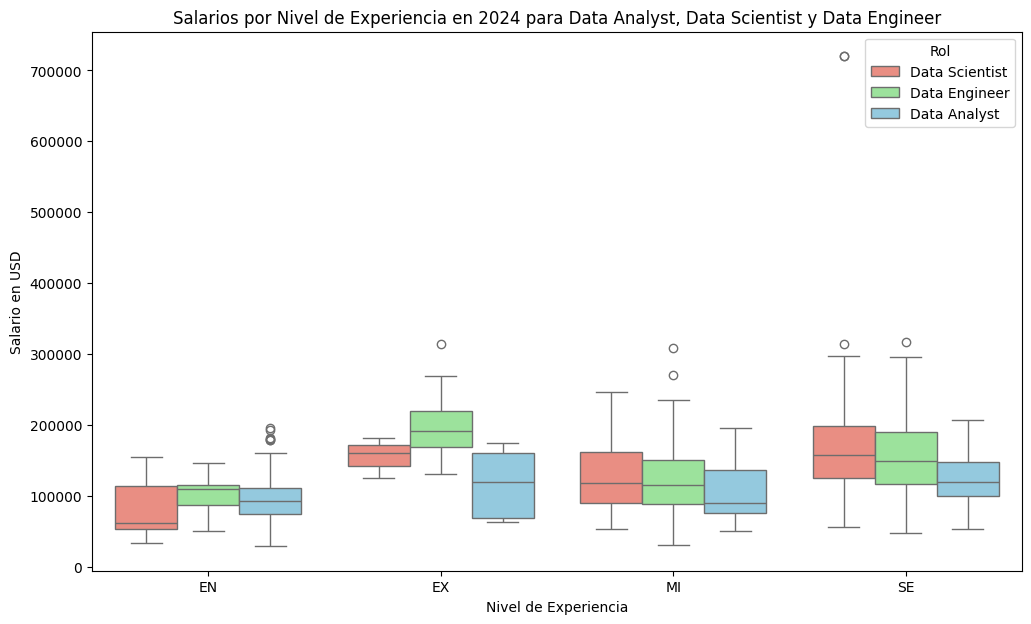

In [ ]:
# Filtrar datos de interés para 2024 y los roles específicos
df_2024 = df[df['work_year'] == 2024]
roles_of_interest = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_roles = df_2024[df_2024['job_title'].isin(roles_of_interest)]

# Filtrar por niveles de experiencia de interés
experience_levels = ['MI', 'SE', 'EX', 'EN']
df_experience_roles = df_roles[df_roles['experience_level'].isin(experience_levels)]

# Boxplot de salarios por nivel de experiencia para los roles especificados
plt.figure(figsize=(12, 7))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='job_title', data=df_experience_roles, palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon', 'Data Engineer': 'lightgreen'})
plt.title('Salarios por Nivel de Experiencia en 2024 para Data Analyst, Data Scientist y Data Engineer')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.legend(title='Rol')
plt.show()


b. Impacto de la experiencia en el salario:

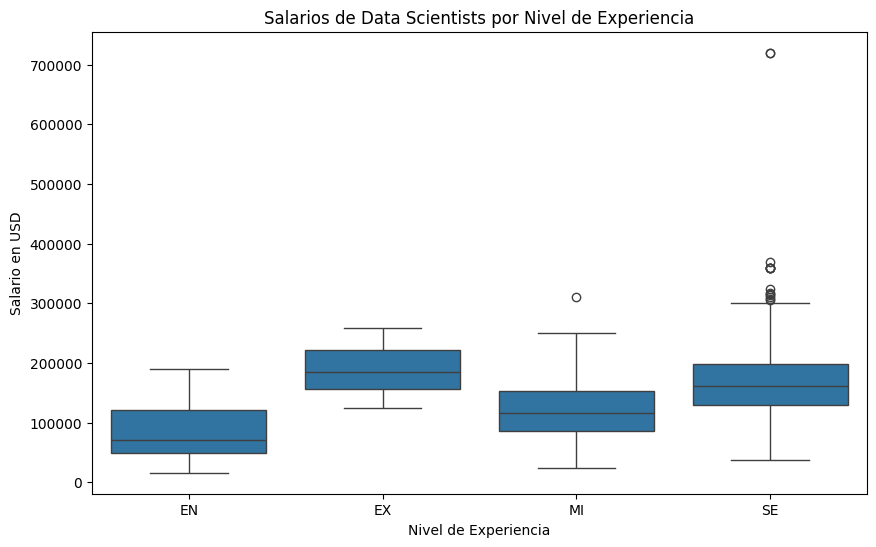

In [ ]:
# Comparar salarios de Data Scientists y Data Analysts por experiencia
df_data_scientist = df[df['job_title'] == 'Data Scientist']

# Boxplot de salarios por rol y ubicación
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_data_scientist)
plt.title('Salarios de Data Scientists por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.show()

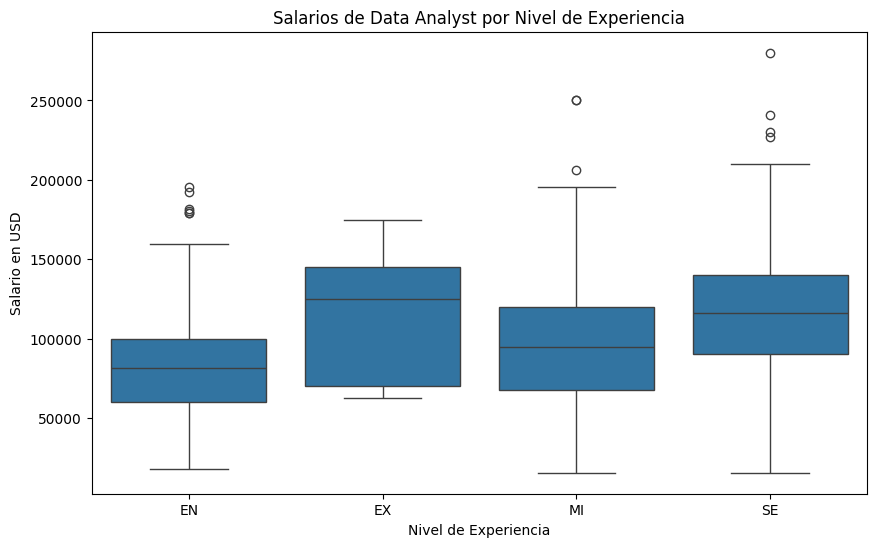

In [ ]:
# Comparar salarios de Data Scientists y Data Analysts por experiencia
df_data_analyst = df[df['job_title'] == 'Data Analyst']

# Boxplot de salarios por rol y ubicación
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_data_analyst)
plt.title('Salarios de Data Analyst por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.show()

---

## 3. Tipo de Empleo (employment_type)
a. Salarios de tiempo completo vs tiempo parcial:

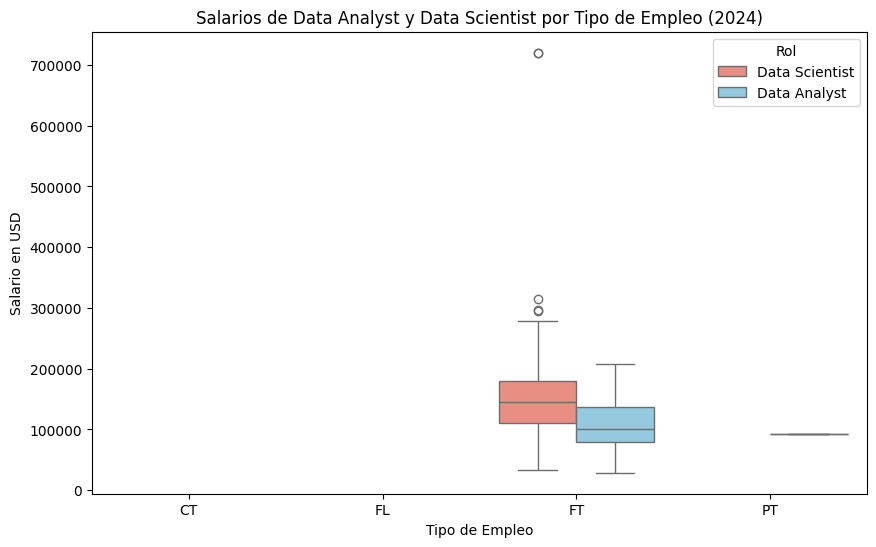

In [ ]:
# Filtrar datos de interés para 2024 y los roles específicos
df_2024 = df[df['work_year'] == 2024]
roles_of_interest = ['Data Analyst', 'Data Scientist']
df_roles = df_2024[df_2024['job_title'].isin(roles_of_interest)]
df_employment = df_roles[df_roles['employment_type'].isin(['FT', 'PT', 'FL', 'CT'])]

# Boxplot de comparacion de salarios por tipo de empleo para los roles especificados
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', hue='job_title', data=df_employment, palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon'})
plt.title(f'Salarios de {roles_of_interest[0]} y {roles_of_interest[1]} por Tipo de Empleo (2024)')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario en USD')
plt.legend(title='Rol')
plt.show()

b. Tendencia salarial por modalidad de empleo:

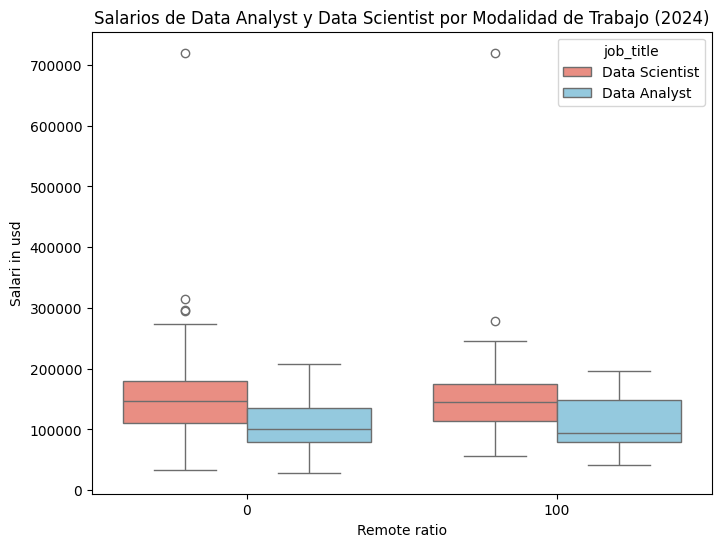

In [ ]:
# Comparar salarios segun tipo de modalidad de empleo (presencial, remoto)
df_2024 = df[df['work_year'] == 2024]
roles_of_interest = ['Data Analyst', 'Data Scientist']
df_roles = df_2024[df_2024['job_title'].isin(roles_of_interest)]
df_remote = df_roles[df_roles['remote_ratio'].isin([0, 100])]

# Boxplot de comparacion de salarios
plt.figure(figsize=(8, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df_remote, hue='job_title', palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon'})
plt.title('Salarios de Data Analyst y Data Scientist por Modalidad de Trabajo (2024)')
plt.xlabel('Remote ratio')
plt.ylabel('Salari in usd')
plt.show()

---

## 4. Título del Trabajo (job_title)


a. Tendencia de salarios por especialización:

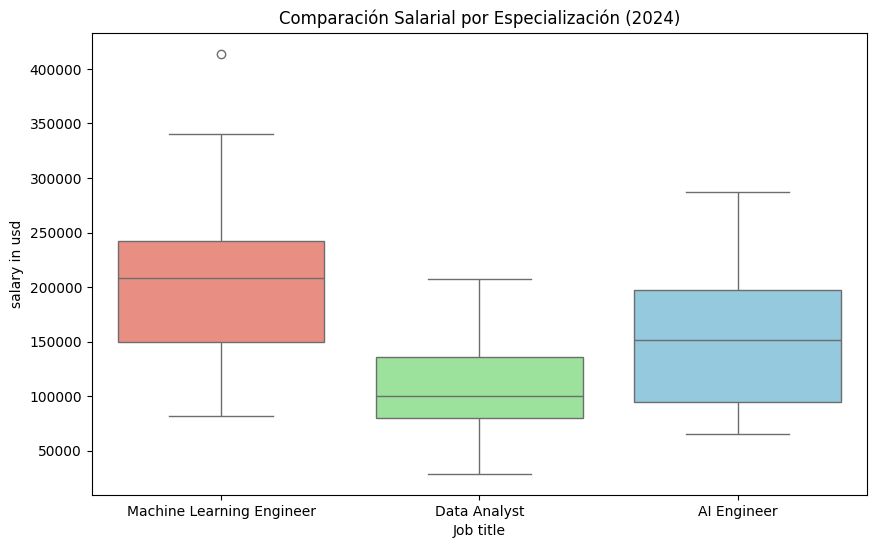

In [ ]:
# Comparar roles técnicos y analíticos
df_2024 = df[df['work_year'] == 2024]
df_specialization = df_2024[df_2024['job_title'].isin(['AI Engineer', 'Machine Learning Engineer', 'Data Analyst'])]

# Boxplot por especializacion
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_specialization, hue='job_title', palette={'AI Engineer': 'skyblue', 'Machine Learning Engineer': 'salmon', 'Data Analyst': 'lightgreen'})
plt.title('Comparación Salarial por Especialización (2024)')
plt.xlabel('Job title')
plt.ylabel('salary in usd')
plt.show()

---

## 5. Salario en USD (salary_in_usd)
a. Promedio salarial global en USD:

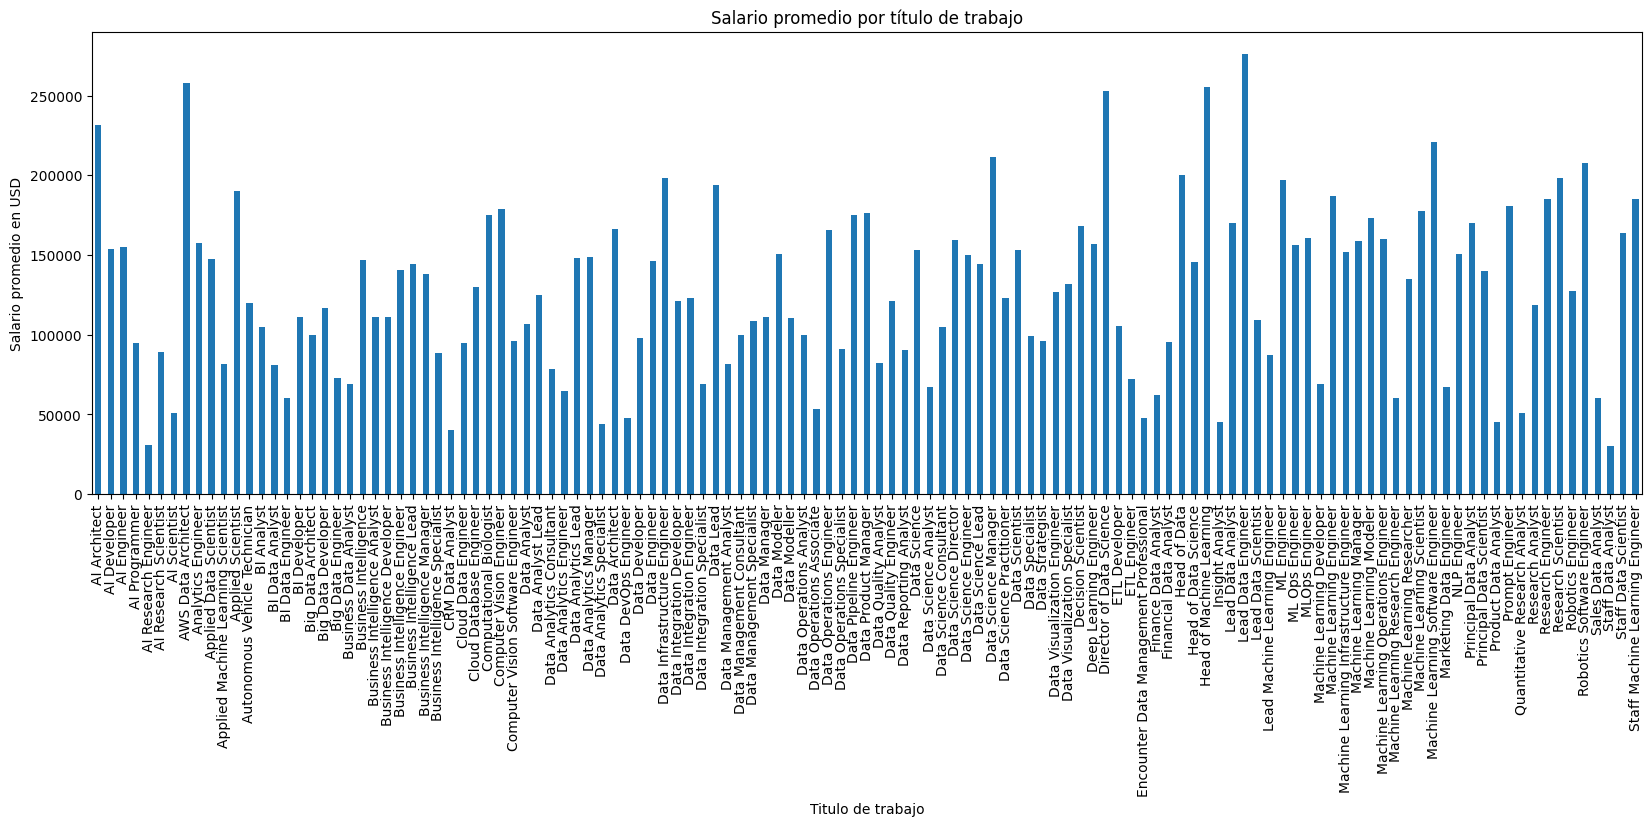

In [ ]:
# Comparar salarios
salary_avg = df.groupby('job_title')['salary_in_usd'].mean()

#Visualizacion
salary_avg.plot(kind='bar', figsize=(20,6))
plt.title('Salario promedio por título de trabajo')
plt.xlabel('Titulo de trabajo')
plt.ylabel('Salario promedio en USD')
plt.show()


b. Dispersión salarial en diferentes roles:

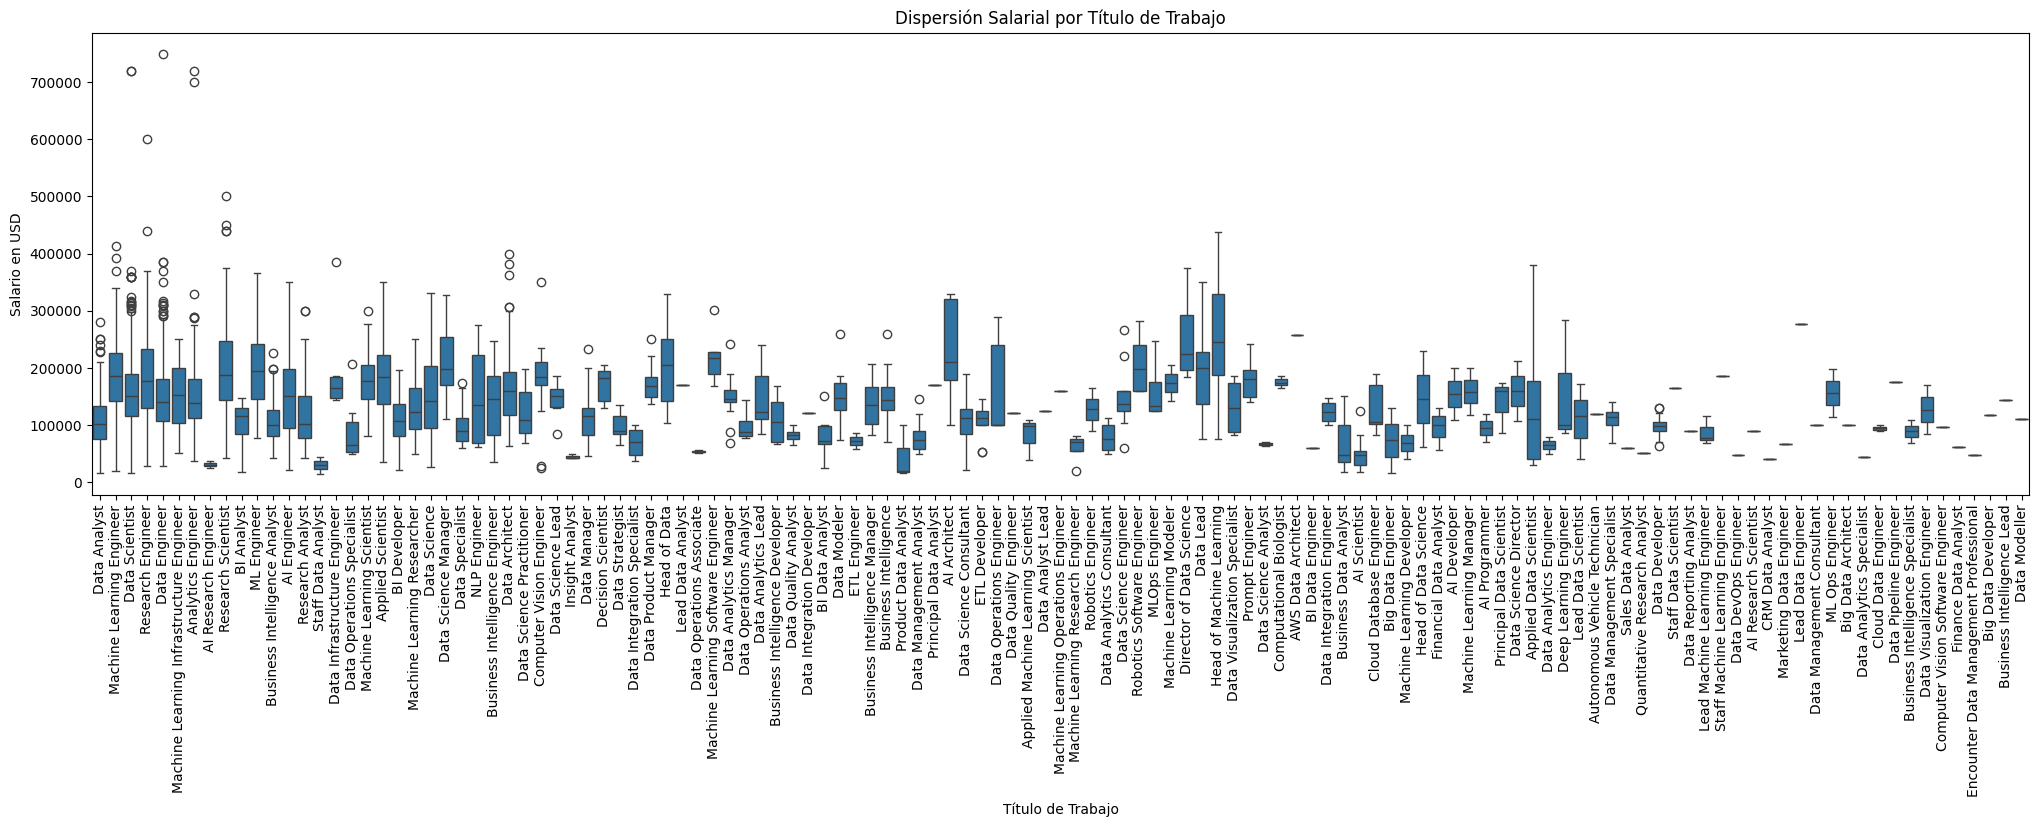

In [ ]:
# Boxplot de dispersión salarial por título de trabajo
plt.figure(figsize=(25, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Dispersión Salarial por Título de Trabajo')
plt.xlabel('Título de Trabajo')
plt.ylabel('Salario en USD')
plt.xticks(rotation=90)
plt.show()


---

## 6. Residencia del Empleado (employee_residence)
a. Impacto de la residencia en el salario:

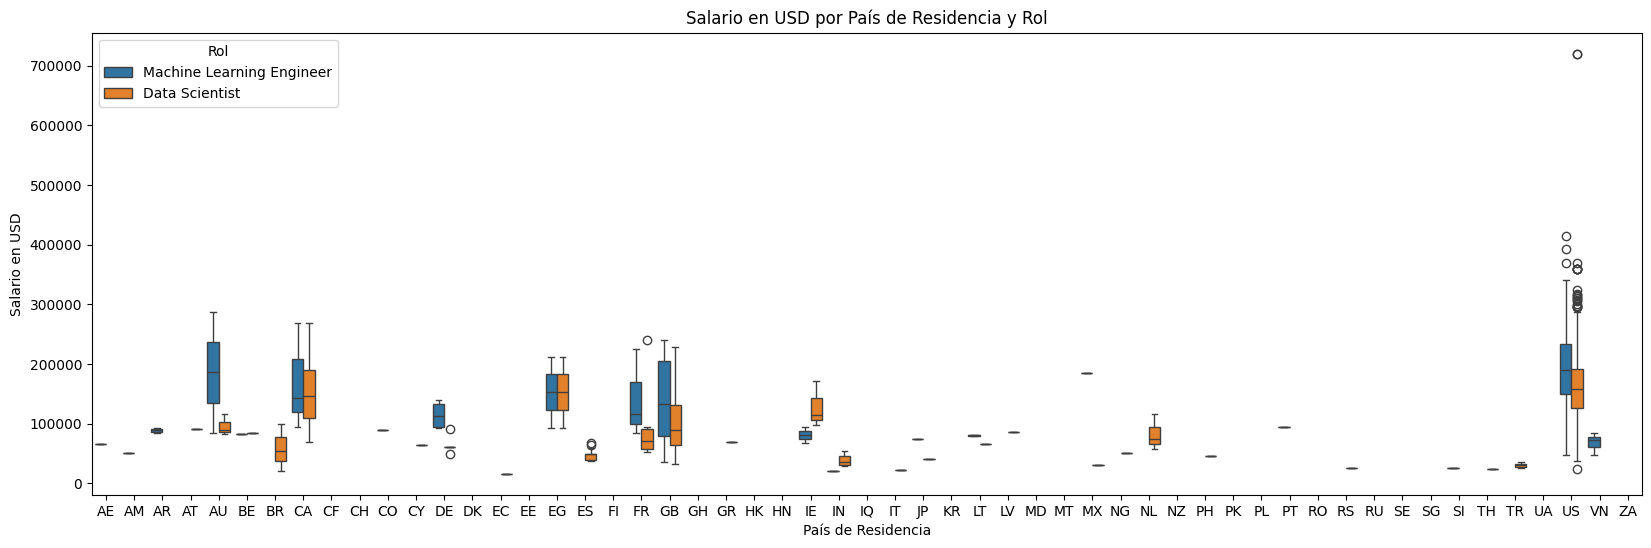


Salario promedio en USD por país de residencia y rol:
job_title           Data Scientist  Machine Learning Engineer
employee_residence                                           
AE                             NaN               65000.000000
AM                             NaN               50000.000000
AR                             NaN               88500.000000
AT                    91237.000000                        NaN
AU                    96141.666667              185682.000000
BE                    84053.000000               82744.000000
BR                    57970.000000                        NaN
CA                   154202.600000              158884.615385
CF                             NaN                        NaN
CH                             NaN                        NaN
CO                             NaN               90000.000000
CY                    63701.000000                        NaN
DE                    64076.000000              114990.800000
DK             

C:\Users\eze_c\AppData\Local\Temp\ipykernel_11828\3397860399.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_salary = df_filtered.groupby(['employee_residence', 'job_title'])['salary_in_usd'].mean().unstack()


In [ ]:
# Filtrar por los roles de interés
roles_of_interest = ['Data Scientist', 'Machine Learning Engineer']
df_filtered = df[df['job_title'].isin(roles_of_interest)]

# Visualizar la distribución salarial por país de residencia y rol
plt.figure(figsize=(20, 6))
sns.boxplot(x='employee_residence', y='salary_in_usd', hue='job_title', data=df_filtered)
plt.title('Salario en USD por País de Residencia y Rol')
plt.xlabel('País de Residencia')
plt.ylabel('Salario en USD')
plt.legend(title='Rol')
plt.show()

# Calcular y mostrar el salario promedio por país y rol
average_salary = df_filtered.groupby(['employee_residence', 'job_title'])['salary_in_usd'].mean().unstack()
print("\nSalario promedio en USD por país de residencia y rol:")
print(average_salary)

b. Análisis de salarios por país:

C:\Users\eze_c\AppData\Local\Temp\ipykernel_11828\659837925.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_ds_country = df_ds.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)


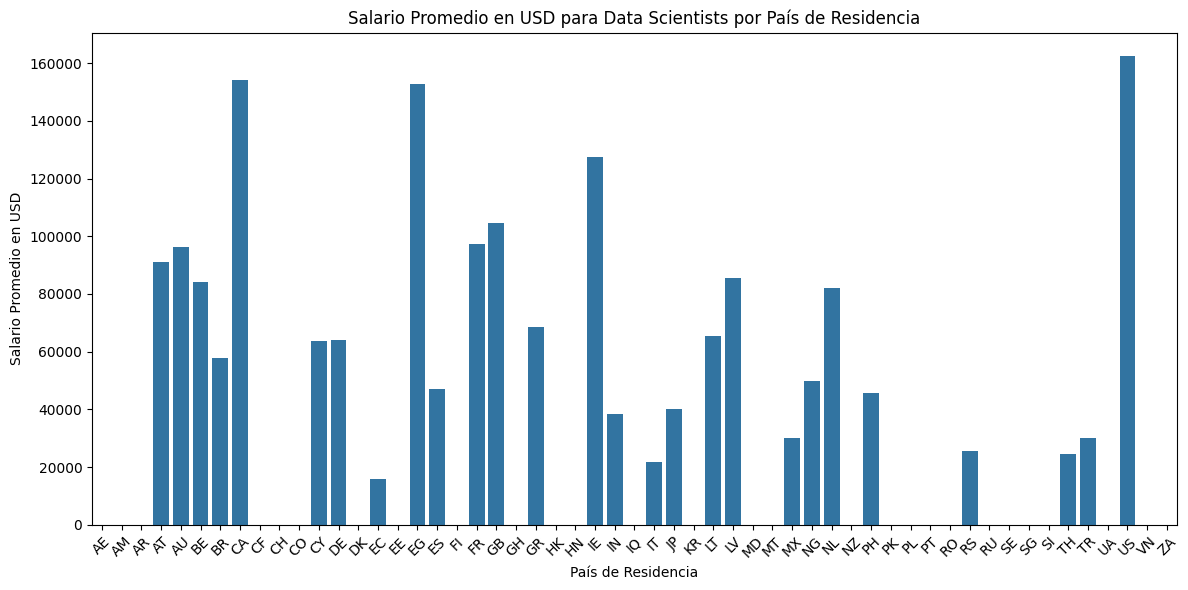


Salario promedio en USD para Data Scientists por país:
employee_residence
US    162400.484340
CA    154202.600000
EG    152650.000000
IE    127390.333333
GB    104645.057143
FR     97176.333333
AU     96141.666667
AT     91237.000000
LV     85600.000000
BE     84053.000000
NL     82114.000000
GR     68428.000000
LT     65333.000000
DE     64076.000000
CY     63701.000000
BR     57970.000000
NG     50000.000000
ES     46963.545455
PH     45760.000000
JP     40000.000000
IN     38502.857143
MX     30000.000000
TR     29962.000000
RS     25532.000000
TH     24613.000000
IT     21669.000000
EC     16000.000000
AE              NaN
AM              NaN
AR              NaN
CF              NaN
CH              NaN
CO              NaN
DK              NaN
EE              NaN
FI              NaN
GH              NaN
HK              NaN
HN              NaN
IQ              NaN
KR              NaN
MD              NaN
MT              NaN
NZ              NaN
PK              NaN
PL              NaN
PT   

C:\Users\eze_c\AppData\Local\Temp\ipykernel_11828\659837925.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean()


In [ ]:
# Filtrar solo para Data Scientists
df_ds = df[df['job_title'] == 'Data Scientist']

# Calcular el salario promedio en USD por país para Data Scientists
avg_salary_ds_country = df_ds.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)

# Visualizar los salarios promedio por país para Data Scientists
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_ds_country.index, y=avg_salary_ds_country.values)
plt.title('Salario Promedio en USD para Data Scientists por País de Residencia')
plt.xlabel('País de Residencia')
plt.ylabel('Salario Promedio en USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nSalario promedio en USD para Data Scientists por país:")
print(avg_salary_ds_country)



# Promedio de salario por país
salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean()

---

## 7. Proporción de Trabajo Remoto (remote_ratio)
a. Impacto de trabajo remoto en salarios:

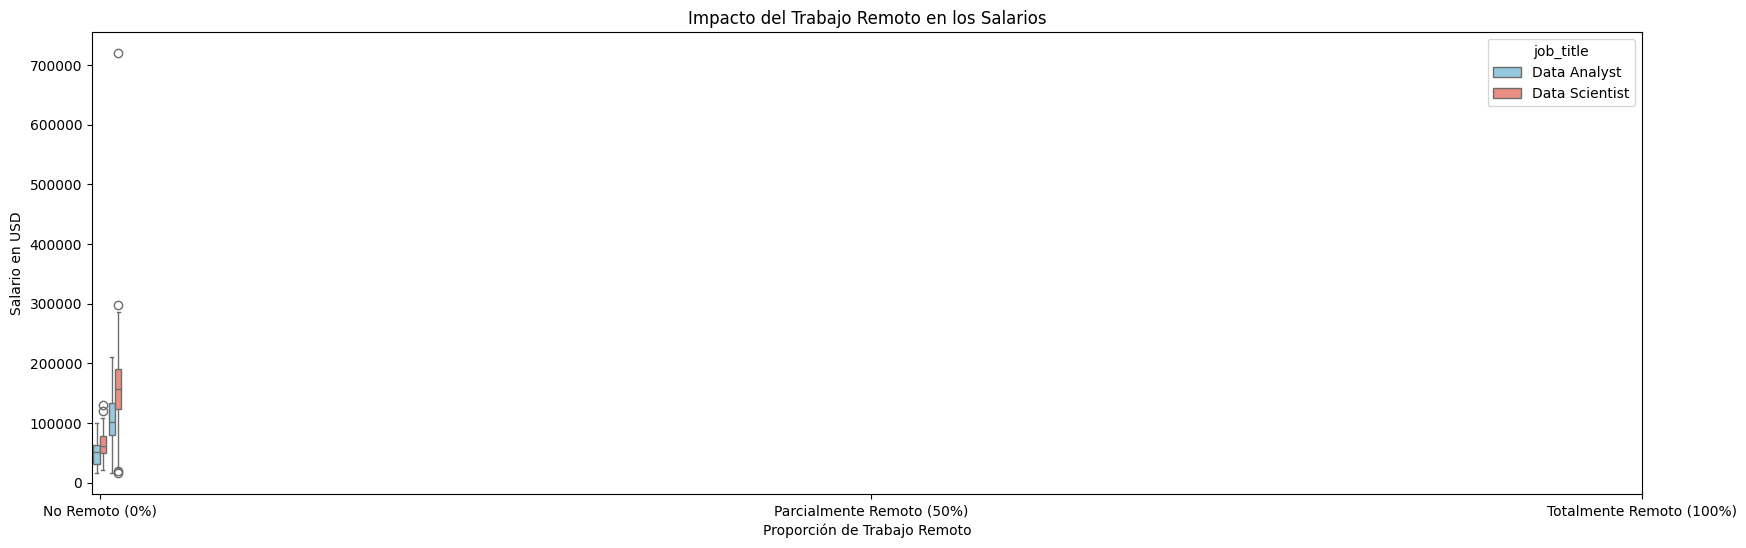

In [ ]:
# Análisis de trabajo remoto
df_remote_analysis = df[df['remote_ratio'] > 0]
# Roles especificos
roles_of_interest = ['Data Analyst', 'Data Scientist']
remote_analysis_roles = df_remote_analysis[df_remote_analysis['job_title'].isin(roles_of_interest)]

# Boxplot de salarios por proporción de trabajo remoto
plt.figure(figsize=(20, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=remote_analysis_roles, hue='job_title', palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon'})
plt.title('Impacto del Trabajo Remoto en los Salarios')
plt.xlabel('Proporción de Trabajo Remoto')
plt.ylabel('Salario en USD')
plt.xticks([0, 50, 100], ['No Remoto (0%)', 'Parcialmente Remoto (50%)', 'Totalmente Remoto (100%)'])
plt.show()


---

# 8. Ubicación de la Empresa (company_location)
a. Salarios por ubicación de la empresa:

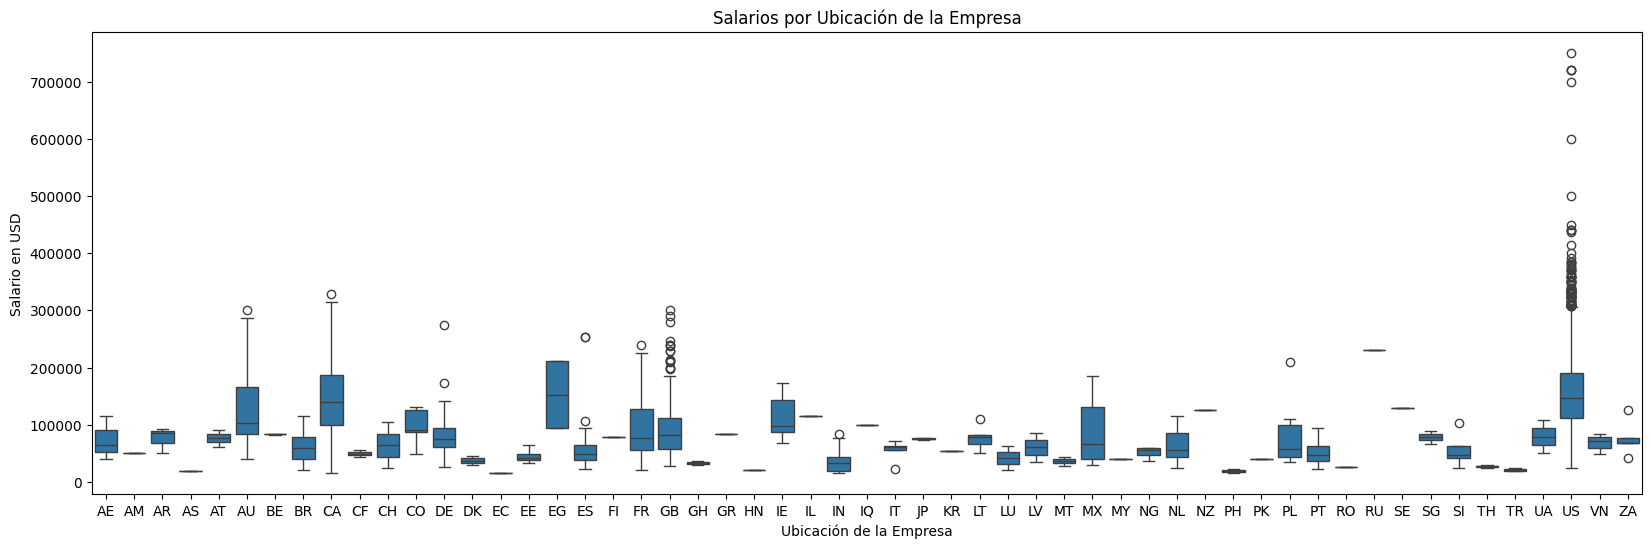

In [ ]:
# Boxplot de salarios por ubicación de la empresa
plt.figure(figsize=(20, 6))
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.title('Salarios por Ubicación de la Empresa')
plt.xlabel('Ubicación de la Empresa')
plt.ylabel('Salario en USD')
plt.show()


---

## 9. Tamaño de la Empresa (company_size)
a. Relación entre tamaño de la empresa y salario:

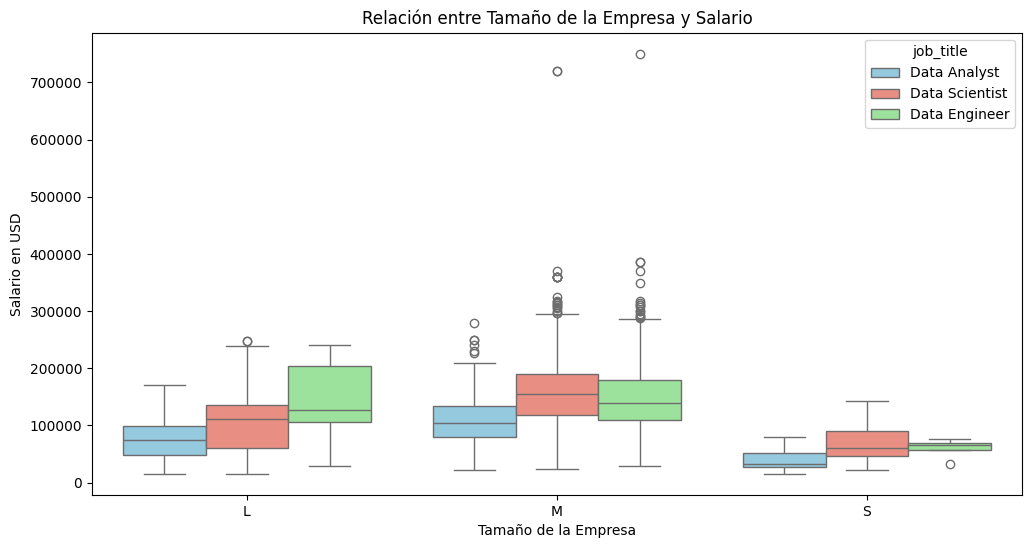

In [ ]:
# Roles especificos
roles_of_interest = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_roles = df[df['job_title'].isin(roles_of_interest)]

# Boxplot por tamaño de la empresa
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df_roles, hue='job_title', palette={'Data Analyst': 'skyblue', 'Data Scientist': 'salmon', 'Data Engineer': 'lightgreen'})
plt.title('Relación entre Tamaño de la Empresa y Salario')
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario en USD')
plt.show()


---

# Conclusiones y Recomendaciones

Resumen de hallazgos.

---

### **1. Análisis por Años de Trabajo (work_year)**

- **Resumen de la tendencia salarial (2022-2024)**:

  * Data Scientist: Tendencia ligeramente creciente.
  * Data Analyst: Tendencia creciente con ligera fluctuación.
  * Data Engineer: Tendencia creciente más pronunciada.


- **Variaciones salariales por año y puesto**:  
  * Data Analysts: Se observan fluctuaciones salariales con un rango intercuartílico entre aproximadamente $80,000 y $130,000 USD, y algunos valores atípicos superiores.
  * Data Scientists: Muestran una mayor dispersión salarial en 2024, con un rango intercuartílico entre alrededor de $110,000 y $180,000 USD, y valores atípicos significativamente más altos.

---

### **2. Impacto del Nivel de Experiencia (experience_level)**

- **Comparación de salarios por nivel de experiencia**:  
  * Data Scientist: El salario tiende a aumentar con el nivel de experiencia (EN < MI < SE < EX), con una dispersión notable en todos los niveles y algunos valores atípicos altos.
  * Data Analyst: Similar a Data Scientist, el salario promedio generalmente aumenta con la experiencia. La dispersión salarial es menor en comparación con Data Scientist, pero también presenta valores atípicos.
  * Data Engineer: También muestra una tendencia de aumento salarial con la experiencia. La dispersión parece ser intermedia entre Data Scientist y Data Analyst.

- **Impacto de la experiencia en el salario de *Data Analysts* y *Data Scientists***:  
  * Data Scientists: Sí, los Data Scientists senior (SE) tienden a ganar sustancialmente más que los junior (EN). El boxplot muestra una mediana y un rango intercuartílico significativamente mayores para el nivel SE en comparación con EN. También se observan valores atípicos más altos en los niveles de mayor experiencia.
  * Data Analysts: (Basándonos en el gráfico actual de Data Analysts) Los salarios de los Data Analysts también muestran una tendencia creciente con el nivel de experiencia (EN < MI ≈ EX < SE). Los Data Analysts senior (SE) generalmente ganan más que los junior (EN), con una mediana salarial notablemente superior. Los niveles EX y MI muestran rangos intercuartílicos similares, aunque con algunas diferencias en los valores atípicos y los bigotes.
---

### **3. Tipo de Empleo (employment_type)**

- **Salarios de tiempo completo vs tiempo parcial**:  
  El gráfico muestra la distribución salarial de Data Scientists y Data Analysts por tipo de empleo en 2024. Solo hay datos significativos para tiempo completo (FT), donde Data Scientists tienden a tener salarios más altos y una mayor dispersión que los Data Analysts. No se pueden sacar conclusiones comparativas robustas para contrato (CT), freelance (FL) y tiempo parcial (PT) debido a la falta de datos o su escasa representación.

- **Tendencia salarial por modalidad de empleo (remoto, híbrido, oficina)**:  
  El gráfico compara salarios de Data Scientists y Data Analysts entre trabajo presencial (remote_ratio 0) y completamente remoto (remote_ratio 100) en 2024. No se observan diferencias salariales medianas significativas entre las modalidades para ninguno de los roles. La dispersión salarial parece similar en ambos casos.
---

### **4. Título del Trabajo (job_title)**

- **Comparación salarial por título de trabajo**:  
- **Tendencia de salarios por especialización**:  
  Sí, existen diferencias salariales claras. AI Engineers y Machine Learning Engineers tienden a tener salarios significativamente más altos en 2024 que los Data Analysts, según el gráfico.

---

### **5. Salario en USD (salary_in_usd)**

- **Promedio salarial global en USD**:  
  El gráfico de barras muestra el salario promedio en USD para cada título de trabajo listado en el eje x. La altura de cada barra representa el salario promedio correspondiente a ese puesto específico.

- **Dispersión salarial en diferentes roles**:  
  El gráfico de cajas muestra la dispersión de salarios para cada título de trabajo en el eje x. La altura de cada caja representa el rango intercuartílico (IQR), indicando dónde se concentra el 50% central de los salarios. Los bigotes se extienden para mostrar la variabilidad fuera de los cuartiles, y los puntos individuales representan posibles valores atípicos (salarios significativamente más altos o más bajos que el resto de los datos para ese rol).

---

### **6. Residencia del Empleado (employee_residence)**

- **Impacto de la residencia en el salario**:  
  El gráfico muestra la distribución de salarios en USD para Data Scientists y Machine Learning Engineers en diferentes países de residencia. El salario promedio por país y rol se presenta en la tabla adjunta.

  Ejemplo de comparación (EE. UU. vs. España):

  Sí, basándonos en los datos promedio proporcionados:

  El salario promedio de un Data Scientist en EE. UU. ($162,400.48) es significativamente mayor que el salario promedio de un Data Scientist en España ($46,963.55) después de ajustar por la moneda (ya que los salarios se muestran en USD).
  De manera similar, el salario promedio de un Machine Learning Engineer en EE. UU. ($194,994.29) es considerablemente más alto que el salario promedio de un Machine Learning Engineer en España (no hay datos promedio disponibles para este rol en España en la tabla).
  Variaciones salariales por país:

  En general, se observan variaciones salariales sustanciales entre países para ambos roles. Países como EE. UU., Canadá y algunos países de Europa Occidental tienden a tener salarios promedio más altos en comparación con países de otras regiones. Sin embargo, la disponibilidad de datos varía significativamente entre países, lo que dificulta una comparación exhaustiva para todos los lugares.

- **Análisis de salarios por país**:  
  Países con los salarios promedio más altos (aproximadamente): US (Estados Unidos), CA (Canadá), EG (Egipto), AU (Australia), IE (Irlanda).
  Países con los salarios promedio más bajos (aproximadamente): EC (Ecuador), IT (Italia), RS (Serbia), TH (Tailandia), TR (Turquía), MX (México), IN (India).

---

### **7. Proporción de Trabajo Remoto (remote_ratio)**

- **Impacto de trabajo remoto en salarios**:  
  El gráfico compara salarios de Data Analysts y Data Scientists según la proporción de trabajo remoto (0%, 50%, 100%). No se observa una tendencia clara y consistente en la mediana salarial entre las diferentes modalidades de trabajo para ninguno de los roles presentes. La dispersión salarial también parece comparable entre las categorías de trabajo remoto.

- **Comparación de salarios según tipo de trabajo remoto**:  
  La gráfica no distingue entre empresas remotas y presenciales. Para saber si los roles de datos a tiempo completo remoto ganan más, se requeriría una gráfica con esa clasificación específica.

---

### **8. Ubicación de la Empresa (company_location)**

- **Salarios por ubicación de la empresa**:  
  Empresas en EE. UU. (US) tienden a pagar salarios significativamente más altos que la mayoría de las empresas en Europa (ej: ES, DE, FR, GB). Dentro de Europa, Reino Unido (GB) y Francia (FR) muestran salarios algo más altos que otros países europeos. Para identificar las empresas específicas con los salarios más altos por región, se necesitarían datos a nivel de empresa.

---

### **9. Tamaño de la Empresa (company_size)**

- **Relación entre tamaño de la empresa y salario**:
  Data Scientists: Las empresas medianas (M) tienden a ofrecer los salarios más altos para Data Scientists, con una mediana y un rango superior significativamente mayores que las empresas grandes (L) y pequeñas (S).
  Data Engineers: Similar a los Data Scientists, las empresas medianas (M) parecen ofrecer los salarios más altos para Data Engineers, superando a las empresas grandes (L) y pequeñas (S).
  Data Analysts: Las empresas medianas (M) también muestran una tendencia a ofrecer salarios más altos para Data Analysts en comparación con las empresas pequeñas (S). La diferencia entre las empresas medianas (M) y grandes (L) no es tan pronunciada como en los otros roles.

---

# Preparación de los Datos para Machine Learning
Los outliers pueden influir en el rendimiento de los modelos. Lo primero que haremos es fijarnos en los posibles outliers y los trataremos de manera adecuada.

In [4]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('global_tech_salary.csv')
df1 = df.copy() #Esto lo hago para no modificar el original

In [5]:
print(df1['experience_level'].value_counts())

experience_level
SE    3248
MI    1215
EN     375
EX     162
Name: count, dtype: int64


In [6]:
print(df1['company_size'].value_counts())

company_size
M    4603
L     335
S      62
Name: count, dtype: int64


In [7]:
print(df1['company_location'].value_counts())

company_location
US    4402
GB     202
CA     115
ES      52
DE      34
FR      20
IN      16
AU      16
PT      12
NL      11
BR       9
IE       7
PL       6
MX       6
IT       5
LT       5
ZA       5
CO       5
EG       4
SI       4
EE       4
NG       4
VN       3
TR       3
AR       3
AE       3
BE       2
DK       2
UA       2
CF       2
PH       2
TH       2
LU       2
AT       2
CH       2
SG       2
MT       2
JP       2
GR       2
LV       2
GH       2
AM       1
HN       1
SE       1
MY       1
RU       1
NZ       1
AS       1
RO       1
EC       1
FI       1
PK       1
KR       1
IL       1
IQ       1
Name: count, dtype: int64


In [8]:
df1 = df1[df1['experience_level'] != 'EN'] #Eliminamos los que tienen poca experiencia ya que su salario puede ser muy diferente

In [9]:
print(df1.head())

   work_year experience_level employment_type                  job_title  \
0       2023               MI              FT               Data Analyst   
1       2023               MI              FT               Data Analyst   
2       2024               MI              FT  Machine Learning Engineer   
3       2024               SE              FT             Data Scientist   
4       2023               MI              FT          Research Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  165000             USD         165000                 AU             0   
1   70000             USD          70000                 US           100   
2   85000             EUR          94444                 IE           100   
3   92700             USD          92700                 US             0   
4  150000             USD         150000                 US             0   

  company_location company_size  
0               AU            M  
1           

Eliminaremos algunos roles para centrarnos en el top 3 con mayor cantidad de datos. Haremos esto para tratar de que el modelo predictivo tenga mucha precisión, ya que hay varios roles donde el salario varía demasiado y será más difícil lograr una precisión que consideramos buena.

In [10]:
roles_de_interes = [
    'Data Engineer',
    'Data Scientist',
    'Data Analyst',
#    'Machine Learning Engineer',
#    'Research Scientist',
#    'Applied Scientist',
#    'Analytics Engineer',
#    'Data Architect',
]

#df1.loc[:, 'job_title'] = df1['job_title'].apply(lambda x: x if x in roles_de_interes else 'Other')
df1 = df1[df1['job_title'].isin(roles_de_interes)]

In [11]:
# Utilizando ploty para observar los outliers
df_selected = df1[['salary_in_usd', 'work_year']]
for column in df_selected.columns:
    fig = px.box(df1, y=column, title=f'Distribution of {column}')
    fig.show()

Los datos de la columna work_year lo dejaré así como está. Pero, trataré los datos de la columna salary_in_usd.

In [12]:
df1 = df1[df1['salary_in_usd']< 286000]
fig = px.box(df1, y='salary_in_usd', title='Distribution of salary_in_usd')
fig.show()

Verificamos skewness para ver como están distribuidos mis datos

In [13]:
from scipy.stats import skew

salary_skew = skew(df1['salary_in_usd'])
print(f'Skewness de salary_in_usd: {salary_skew}')

Skewness de salary_in_usd: 0.2853070321337236


No es necesario aplicar logaritmo porque skewness es lo suficientemente bajo.

In [14]:
df1['job_title'].value_counts()

,count
job_title,
Data Engineer,1008
Data Scientist,958
Data Analyst,598


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Seleccionamos la variable objetivo y lo separamos
X = df1.drop(['salary_in_usd', 'salary_currency', 'salary', 'employment_type'], axis=1)
y = df1['salary_in_usd'] # Esta es la variable objetivo

# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo el pipelune
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Pipeline para los datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para los datos no numéricos
categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

# Aplicamos las transformaciones para los tipos de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ],
    remainder='passthrough' #Esto es para evitar que se convierta en un array
)

# Creo el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Implementación del modelo

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creamos los modelos
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Diccionario para guardar resultados
results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R2": []
}

# Evaluamos cada uno de los modelos
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results["Model"].append(name)
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["MSE"].append(mean_squared_error(y_test, y_pred))
    results["R2"].append(r2_score(y_test, y_pred))

# Mostramos los resultados en un DataFrame}
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))


               Model           MAE           MSE        R2
4            XGBoost  33935.007812  1.782706e+09  0.249069
0  Linear Regression  34220.592693  1.793852e+09  0.244374
3      Random Forest  34711.180285  1.871735e+09  0.211568
1                KNN  35057.954776  1.935330e+09  0.184780
2      Decision Tree  35020.371273  1.951612e+09  0.177921


Tratare de mejorar XGBoost utilizando XGBoost

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid_XGB = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__subsample': [0.6, 0.8, 1.0]
}

grid_XGB = GridSearchCV(pipeline, param_grid_XGB, cv=5, scoring='neg_mean_squared_error')

#Entreno los modelos
grid_XGB.fit(X_train, y_train)

#Veo los mejores parámetros
print('Mejores parámetros:', grid_XGB.best_params_)
print('Mejor validación cruzada para XGBosst:', round(grid_XGB.best_score_, 4))


Mejores parámetros: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}
Mejor validación cruzada para XGBosst: -1857790720.0


Ahora que tenemos los mejores parámetros, evaluamos su desempeño.

In [19]:
best_xgb = grid_XGB.best_estimator_
y_pred_XGB_best = best_xgb.predict(X_test)
print("XGBoost ajustado en prueba:")
print("MAE:", mean_absolute_error(y_test, y_pred_XGB_best))
print("MSE:", mean_squared_error(y_test, y_pred_XGB_best))
print("R2:", r2_score(y_test, y_pred_XGB_best))

XGBoost ajustado en prueba:
MAE: 34011.9140625
MSE: 1789386240.0
R2: 0.24625557661056519


# Implementación de Redes Neuronales

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df1.drop(['salary_in_usd', 'salary_currency', 'salary', 'employment_type'], axis=1)
y = df1['salary_in_usd'] # Esta es la variable objetivo

# Separamos los datos
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Coviertimos los datos no numéricos
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)

# Separamos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definimos el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Entrada con 128 neuronas
    Dropout(0.3), # Capa de dropout con 30%
    Dense(64, activation='relu'), # Capa oculta con 64 neuronas
    Dropout(0.3), # Capa de dropout con 30%
    Dense(32, activation='relu'),  # Capa con 32 neuronas,
    Dropout(0.3), #Capa dropout con 30%
    Dense(1)
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Definimos el early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluamos el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 139159.0625 - mae: 139159.0625 - val_loss: 136541.7344 - val_mae: 136541.7188
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142143.5938 - mae: 142143.5938 - val_loss: 136179.8906 - val_mae: 136179.8906
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138063.4531 - mae: 138063.4531 - val_loss: 133952.7031 - val_mae: 133952.7031
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136566.3594 - mae: 136566.3594 - val_loss: 126006.5781 - val_mae: 126006.5781
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124463.9141 - mae: 124463.9141 - val_loss: 105380.9844 - val_mae: 105380.9844
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102962.6406 - mae: 102962.6406 - val_loss: 65692.3438 - val_mae: 65692.3438
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58915.5430 - mae: 58915.5430 - val_loss: 39917.4102 - val_mae: 39917.4102
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

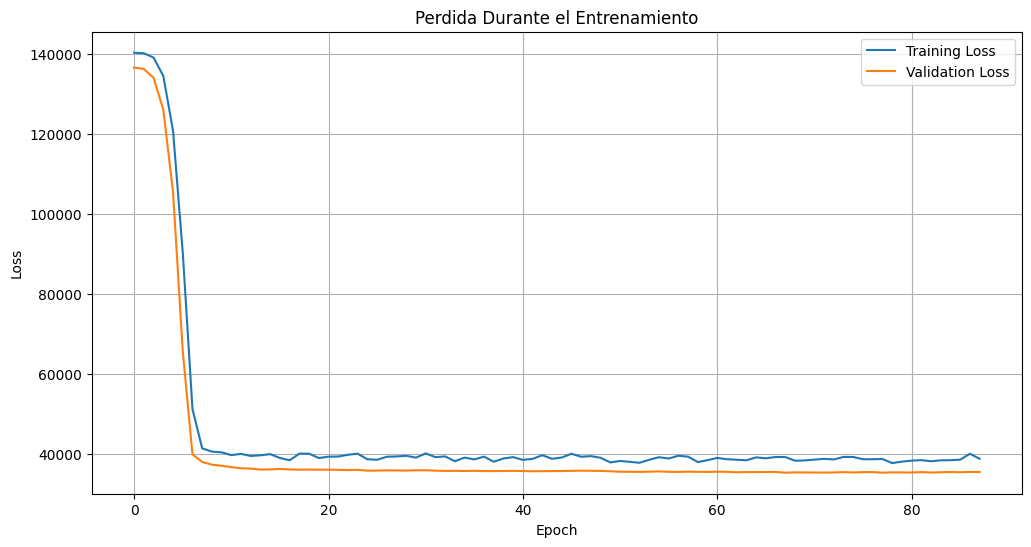

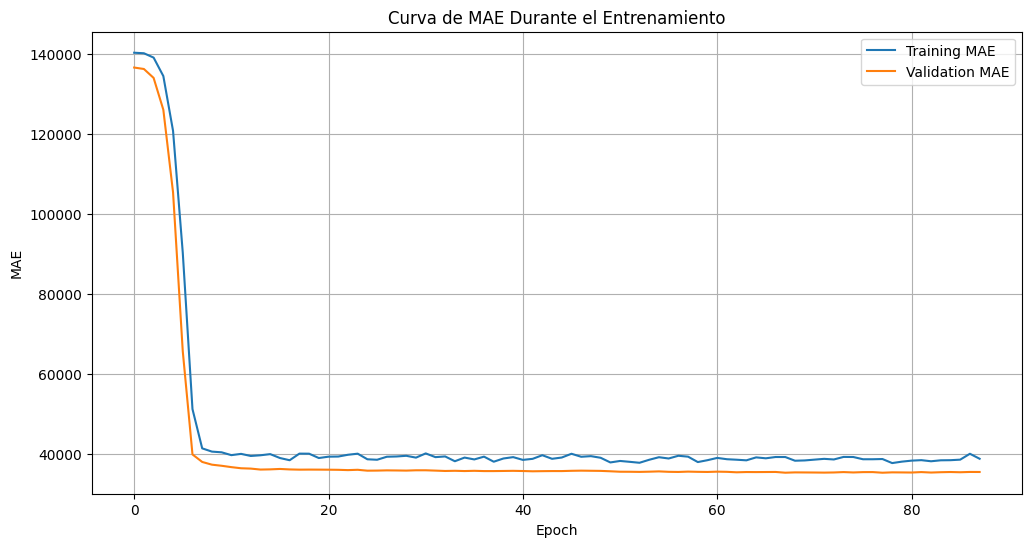

In [21]:
import matplotlib.pyplot as plt

# Plot de la curva de pérdida MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perdida Durante el Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot de la curva de MAE (Error Absoluto Medio)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Curva de MAE Durante el Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import r2_score

# Hacer predicciones
y_pred_nn = model.predict(X_test)

# Calcular R2
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R² Score: {r2_nn}')

#Calcular MSE
MSE = mean_squared_error(y_test, y_pred_nn)
print(f'MSE: {MSE}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.22055530548095703
MSE: 1850398592.0


# Conclusión
Lo que buscamos en esta última sección es predecir el salario anual en dólares americanos de profesionales en el área de los datos, utilizando modelos de Machine Learning y de Deep Learning.

# Preprocesamiento
- Se eliminaron los datos donde el nivel de experiencia era 'EN' (Entry Level) por su baja cantidad de datos y muy alta variabilidad.
- Se filtaron los 3 roles con mayor cantidad de registros: Data Scientist, Data Engineer y Data Analys y se eliminaron los roles minoritarios que podrían dar ruido.
- Se analizaron y filtraron outliers extremos del salario para poder así evitar los sesgos en el entrenamiento del modelo.
- La variable salary_in_usd presentó un skewness de 0.28, eso nos justificó que no necesitamos transformación logarítmica.

# Modelos Comparados
- Comparamos varios algoritmos de regresión, donde observamos que el modelo con mejor desempeño fue el XGBoost con un MAE de 33.935 USD, pero el R2 (0.25) indica que aún existe una alta variabilidad no explicada.
- Realizamos una búsqueda de hiperparámetros (GridSearchCV) sobre XGBoost para tratar de mejorar el modelo, pero no logramos la mejora.

# Red Neuronal
Se entrenó una red neuronal con tres capas ocultas de 128, 64 y 32 y con capas Dropout al 30 % para evitar overfitting.

- MAE: 33.732
- R2 Score: 0.221
- Las curvas tanto de pérdida como de MAE mostraron una convergencia estable y sin signos de overfitting.

# Conclusiones Finales
- El modelo de red neuronal y XGBoost sin ajustar fueron los mejores modelos en términos de error absoluto medio (MAE).
- El R2 bajo en todos los modelos sugiere que existen variables que no están incluidas en el dataset que podrían aportar para la mejora del desempeño.
- Los resultados son aceptables, teniendo en cuenta que se trabaja con salarios, que es una variable volátil y ruidosa, más aún a nivel global.